# Clustering hiérarchique avec SciPy

In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scripts.visualisation import *

# Avec une matrice de distance

Matrice étudiée : 

|    | p1  | p2  | p3  | p4   | p5  |
|----|-----|-----|-----|------|-----|
| p1 | 0   | 0.1 | 0.9 | 0.35 | 0.8 |
| p2 | 0.1 | 0   | 0.3 | 0.4  | 0.5 |
| p3 | 0.9 | 0.3 | 0   | 0.6  | 0.7 |
| p4 | 0.35| 0.4 | 0.6 | 0    | 0.2 |
| p5 | 0.8 | 0.5 | 0.7 | 0.2  | 0   |

On détermine les différents clusters en utilisant la fonction `linkage` de SciPy. Le paramètre `method` permet de spécifier la stratégie d'agrégation des clusters.

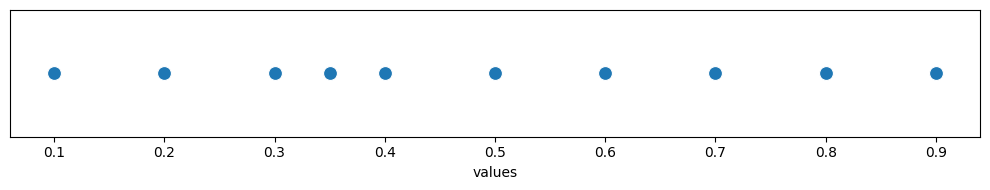

In [3]:
data = [0.1, 0.9, 0.35, 0.8, 0.3, 0.4, 0.5, 0.6, 0.7, 0.2]

df = pd.DataFrame({'values': data})
plot_points_on_line(df, 'values')

In [4]:
single_link = linkage(data, method='single')
complete_link = linkage(data, method='complete')

Enfin, on utilise la fonction `dendrogram` de SciPy pour représenter les clusters sous forme d'arbre hiérarchique (dendrogramme)

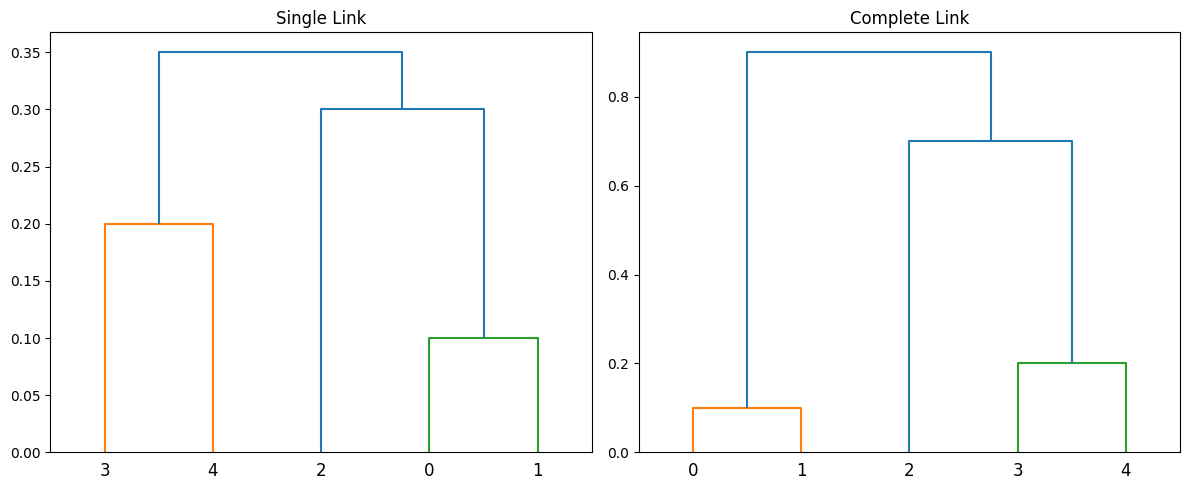

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dendrogram(single_link)
plt.title('Single Link')

plt.subplot(1, 2, 2)
dendrogram(complete_link)
plt.title('Complete Link')

plt.tight_layout()
plt.show()

# Avec une matrice de similarité

Matrice étudiée :
|    | p1   | p2   | p3   | p4   | p5   |
|----|------|------|------|------|------|
| p1 | 1.00 | 0.10 | 0.41 | 0.55 | 0.35 |
| p2 | 0.10 | 1.00 | 0.64 | 0.47 | 0.98 |
| p3 | 0.41 | 0.64 | 1.00 | 0.44 | 0.85 |
| p4 | 0.55 | 0.47 | 0.44 | 1.00 | 0.76 |
| p5 | 0.35 | 0.98 | 0.85 | 0.76 | 1.00 |

Cette fois ci, on a une matrice de similarité. Avant de lancer le clustering, on doit donc la convertir
en matrice de distance.

> Rappel : $\text{distance}(p_i, p_j) = 1 - \text{similarité}(p_i, p_j)$

In [6]:
similarity_matrix = np.array([
    [1.00, 0.10, 0.41, 0.55, 0.35],
    [0.10, 1.00, 0.64, 0.47, 0.98],
    [0.41, 0.64, 1.00, 0.44, 0.85],
    [0.55, 0.47, 0.44, 1.00, 0.76],
    [0.35, 0.98, 0.85, 0.76, 1.00]
])

# Conversion en matrice de distance
distance_matrix = 1 - similarity_matrix

print("Matrice de distance :")
print(distance_matrix)

Matrice de distance :
[[0.   0.9  0.59 0.45 0.65]
 [0.9  0.   0.36 0.53 0.02]
 [0.59 0.36 0.   0.56 0.15]
 [0.45 0.53 0.56 0.   0.24]
 [0.65 0.02 0.15 0.24 0.  ]]


Exactement comme pour la matrice de distance, on extrait toutes les valeurs au dessus de la diagonale principale.

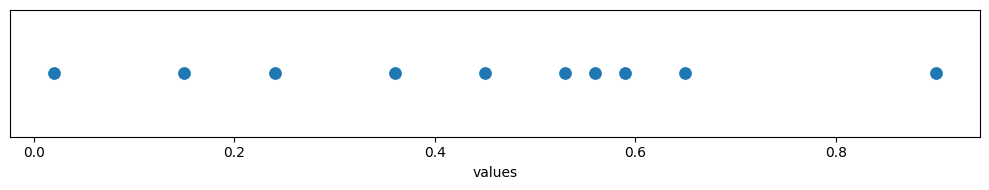

In [7]:
data = [0.9 , 0.59, 0.45, 0.65, 0.36, 0.53, 0.02, 0.56, 0.15, 0.24]

df = pd.DataFrame({'values': data})
plot_points_on_line(df, 'values')

In [8]:
single_link = linkage(data, method='single')
complete_link = linkage(data, method='complete')

Enfin, on utilise la fonction `dendrogram` de SciPy pour représenter les clusters sous forme d'arbre hiérarchique (dendrogramme)

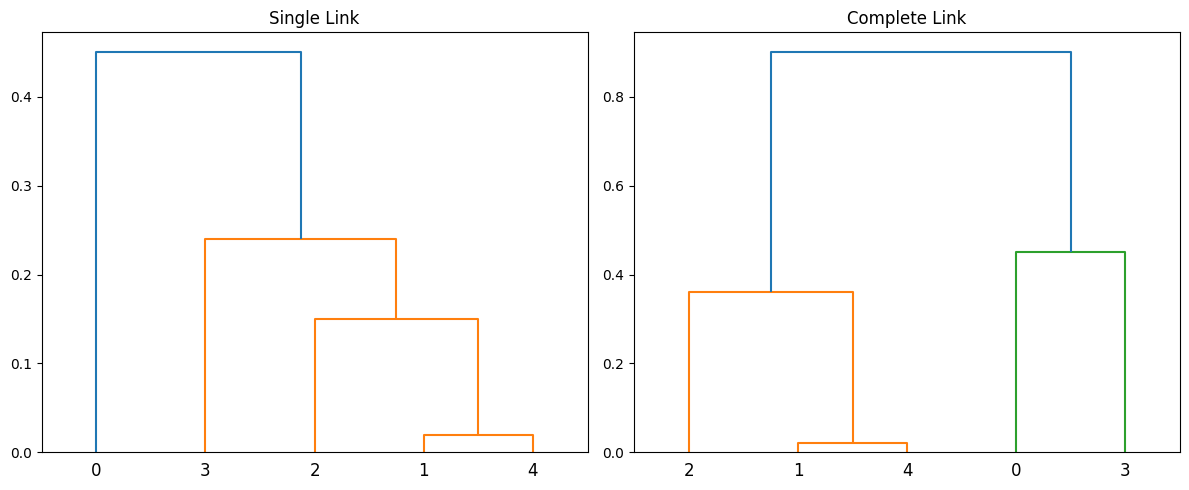

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dendrogram(single_link)
plt.title('Single Link')

plt.subplot(1, 2, 2)
dendrogram(complete_link)
plt.title('Complete Link')

plt.tight_layout()
plt.show()